# Summary

The objective of this study is to determine if there are any long term changes in the rainfall at the UWI Field Station Pot Gauge, using only data visualization techniques. It was found that there are no distinct changes in the intensity of daily rainfall over the years. In terms of monthly data, it was found that in May, rainfall totals were shown to be decreasing, while increasing in November. There was no distinct pattern in the remainder of the months. A plot of the rolling sums of the monthly values showed that the overall rainfall totals are decreasing at the UWI Field Station gauge. Further research is needed to support this claim by studying the surrounding gauges.

# Objective

The objective here is to determine any long term changes at the UWI Field Station pot gauge. This gauge was chosen because it has a long, somewhat uninterrupted periods of rainfall, and so any changes in the rainfall pattern should be easily identifiable. The range of data is from 1920's to present. The data will be plotted using the python libraries pandas and matplotlib, and an attempt will be made to identify any trends. This study is restricted to visualization. Statistical methods are not tested. The questions to be answered are:

#### Is there a change in annual rainfall volume?    
This will be difficult to determine because there are some missing months. Therefore we may be only able to compare monthly values.

#### Is the daily maximum changing?
This should be easy to pull out the daily maximum for each year.

In [1]:
import pandas as pd
%matplotlib inline       

# UWI Field Station

The data was imported from the database as csv files, which includes two columns: Date and rainfall. Rainfall is recorded in mm. The csvs are then imported as pandas dataframes for analysis.

In [2]:
df = pd.read_csv("la_regalada.csv")
df.Date = pd.to_datetime(df.Date)          #Changing the date column to date objects and setting as the index
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.describe()

,Rainfall
count,28345.000000
mean,4.601856
std,9.749058
min,0.000000
25%,0.000000
50%,0.000000
75%,5.000000
max,157.000000


As shown, there are 32,022 days on record in the dataframe. The max and min look to be in a normal range. Checking for nulls.

In [3]:
df['Rainfall'].isnull().sum()

0

Oh right I forgot I removed the nulls when I imported the values into the database. Sweet deal. What's next? Plotting all of the rainfall values would result in a very messy plot, so we going to plot the maximum daily values in each year, to see if there are any changes.

# Daily Maximum

In [4]:
max_df = df.groupby(df.index.year).max()    #This conveniently pulls out the maximum values for each year.
max_df.head()

,Rainfall
Date,
1940,57.9
1941,47.2
1942,127.8
1943,64.5
1944,54.9


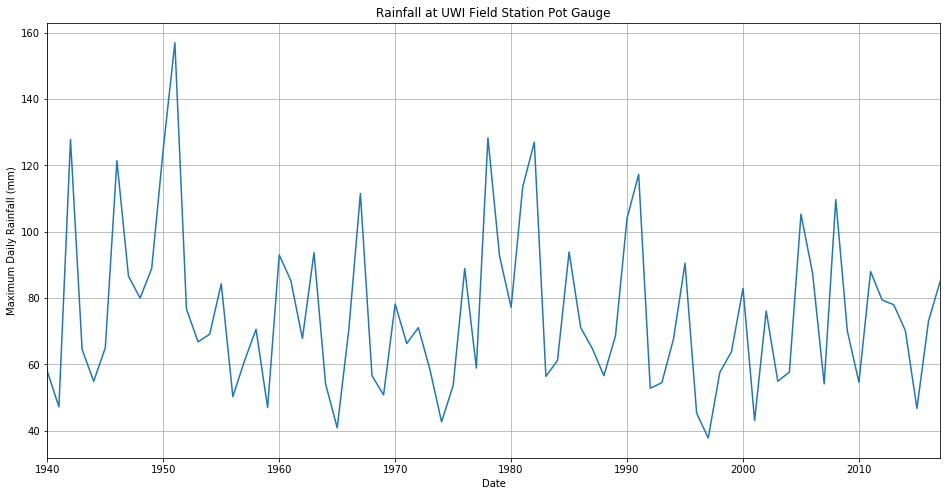

In [5]:
plt = max_df['Rainfall'].plot(figsize=(16,8), title='Rainfall at UWI Field Station Pot Gauge', grid=True)
plt.set_ylabel("Maximum Daily Rainfall (mm)")

What does this tell us? The period 1950 - 1970 looked to be quite tame. Other than that there does not seem to be any major changes. The most rainfall seems to be around 160mm in 1945. Otherwise the maximum rainfall events stayed around 140mm, which is what is expected as the maximum rainfall based on the time I have been at the WRA. 

Now we will sum the rainfall for each month and look at rainfall volumes, as this would give a better idea if rainfall patterns are changing.

# Monthly Rainfall

In [6]:
month_df = df.groupby([(df.index.year),(df.index.month)]).sum()   #groupby to organise by year and month
month_df.head()

Rainfall
Date Date          
1940 1         37.9
     2          9.9
     3         49.3
     4         27.7
     5         39.1

How can we compare the monthly rainfall values to make any conclusions? We can plot for each month to find any trends. A 10 year average is calculated and plotted to better visualize any long term trends.

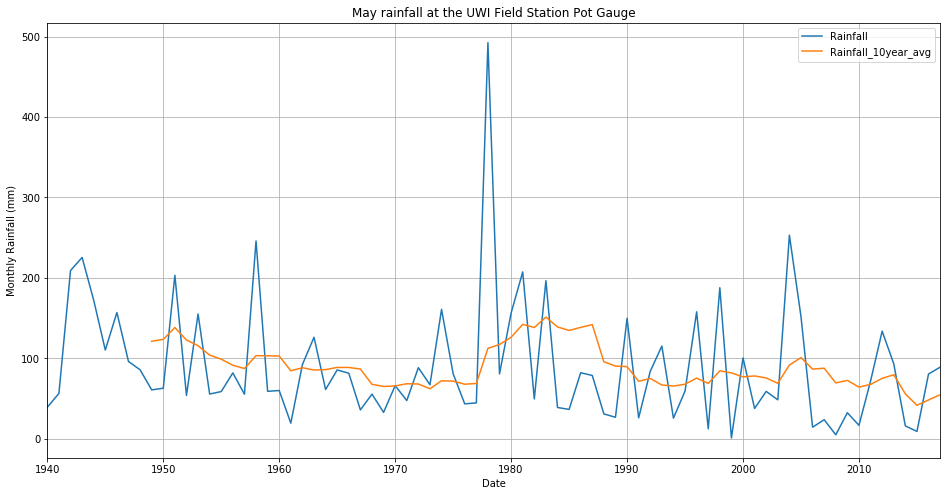

In [7]:
month = df.loc[(df.index.month==5)]     #This pulls out the rainfall for the specified months over all the years
month = month.groupby(month.index.year).sum()
month['Rainfall_10year_avg'] = month['Rainfall'].rolling(window=10).mean()
plt = month[['Rainfall', 'Rainfall_10year_avg']].plot(figsize=(16,8), title='May rainfall at the UWI Field Station Pot Gauge', grid=True)
plt.set_ylabel("Monthly Rainfall (mm)")

The plot for May is shown above. Looking at the 10 year average, the rainfall seems to have decreased from the previous years. Note that there is a very wide range of values for May. This can be expected as it is the trainsition month for the dry season to the wet season.

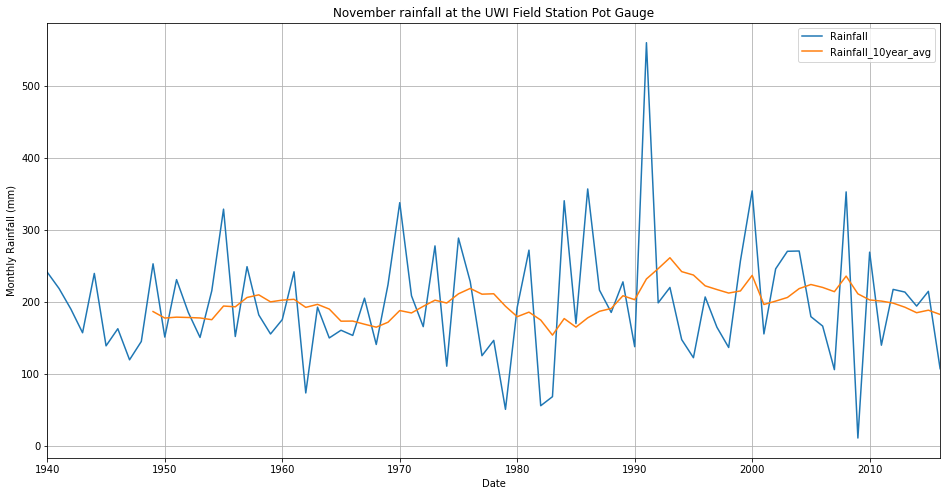

In [8]:
month = df.loc[(df.index.month==11)]
month = month.groupby(month.index.year).sum()
month['Rainfall_10year_avg'] = month['Rainfall'].rolling(window=10).mean()
plt = month[['Rainfall', 'Rainfall_10year_avg']].plot(figsize=(16,8), title='November rainfall at the UWI Field Station Pot Gauge', grid=True)
plt.set_ylabel("Monthly Rainfall (mm)")

The plot for November is shown above. The 10 year average seems to have increased from the previous years. November is usually the wettest month for the entire year. Low values may indicate missing days in the year. I need to clean the data better and possibly delete the months with missing days. However the overall trend seems to have increased, possibly cancelling out the effects of decreased rainfall in May. This may indicate a wetter wet season and a drier dry season. The plots for the other months showed no change in monthly rainfall, and so are not included in this report.

# Rolling Sums

Rolling Sums for a 1 year, 5 year, and 10 year period are calculated.

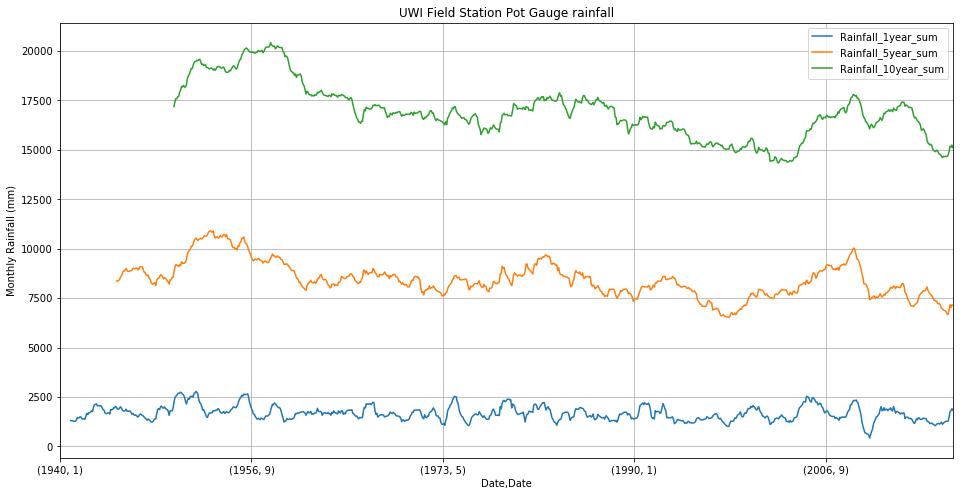

In [9]:
month_df['Rainfall_1year_sum'] = month_df['Rainfall'].rolling(window=12).sum()
month_df['Rainfall_5year_sum'] = month_df['Rainfall'].rolling(window=60).sum()
month_df['Rainfall_10year_sum'] = month_df['Rainfall'].rolling(window=120).sum()
plt = month_df[['Rainfall_1year_sum', 'Rainfall_5year_sum','Rainfall_10year_sum']].plot(figsize=(16,8), title='UWI Field Station Pot Gauge rainfall', grid=True)
plt.set_ylabel("Monthly Rainfall (mm)")

The plot above shows the rolling sums for monthly rainfall over different periods. In the plot of the 1 year rolling totals, there doesn't appear to be any change in the amount of rainfall occuring at the UWI Field Station Pot Gauge. However, the plots of the 5 year and 10 year rolling sums tell a different story.

There was a large decrease of rainfall in the 50's and 60's, and the rainfall returns to a level less than previous and decreasing. This is more pronounced in the 10 year rolling sum. What does this tell us? The rainfall at the UWI Field Station Pot Gauge may very well be decreasing. Rainfall patterns from surrounding gauges are needed to backup this claim. This will be done in another study.

# Conclusions

In the plot of the daily maximum values for each year, it was found that there are no distinct changes in the intensity of daily rainfall over the years.

In the plots of the monthly values, it was found that in May rainfall totals were shown to be decreasing, while increasing in November. There was no distinct pattern in the remainder of the months. 

The plot of the rolling sums of the monthly values showed that the overall rainfall totals are decreasing at the UWI Field Station gauge. Further research is needed to support this claim by studying the surrounding gauges. 